In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

The following code is to check if there is physical GPU device available, and then setup it up for use.

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

NUm GPUs Available:  0


In [ ]:
tf.config.experimental.set_memory_growth(physical_device[0], True)

The following code is to set up a basic sequential model.

In [10]:
model = Sequential([
    Dense(units = 16, input_shape = (1,), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer = Adam(learning_rate = .0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model.fit(x = , y = , 
          validation_split = .1, batch_size = 10, epochs = 30, 
          shuffle = True, verbose = 2)

### Example on the breast cancel data
Here is a test on the breast cancer data.

In [14]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [19]:
# import the data
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X,y = load_breast_cancer(return_X_y = True)


In [20]:
from sklearn.model_selection import train_test_split

# test train split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25,random_state = 614,shuffle = True,stratify = y)

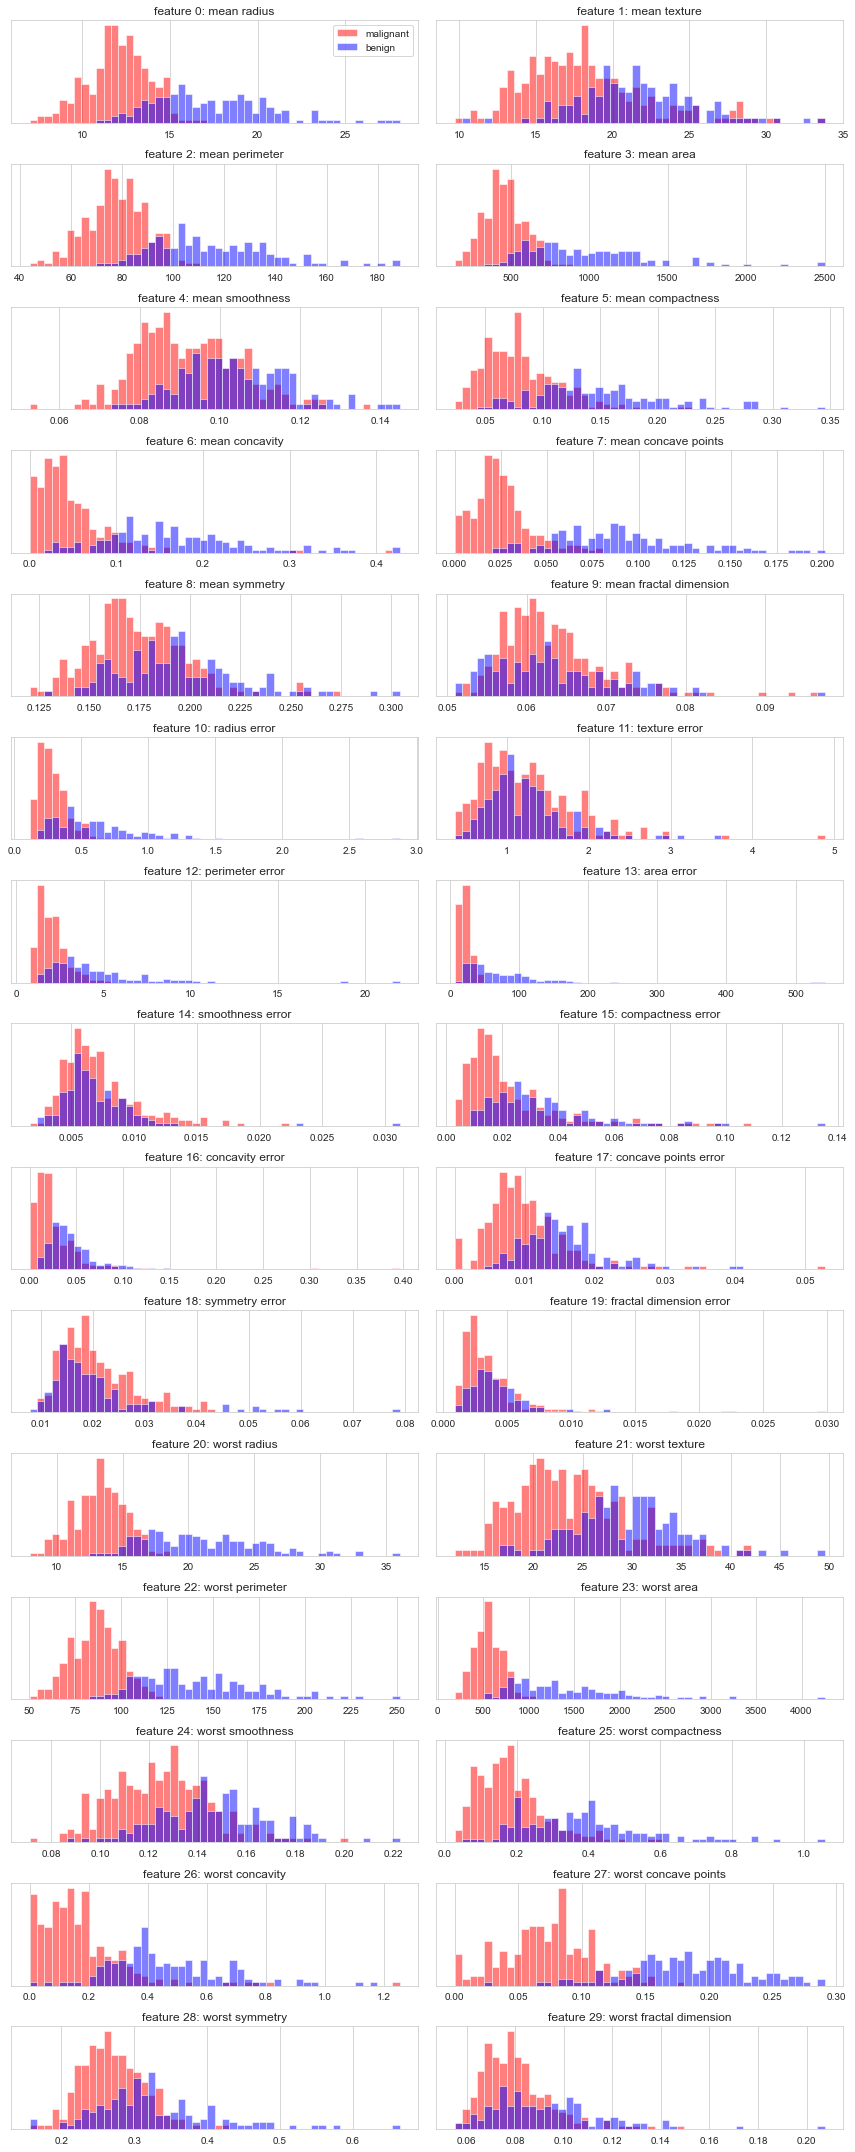

In [21]:
# Let's view the training data
# Note this may take a bit.
fig, axes = plt.subplots(15, 2, figsize = (12,30))

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(X_train[:, i], bins = 50)
    ax[i].hist(X_train[y_train == 1, i], bins = bins, color = 'red', alpha = .5)
    ax[i].hist(X_train[y_train == 0, i], bins = bins, color = 'blue', alpha = .5)
    ax[i].set_title("feature " + str(i) + ": " + cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].legend(['malignant', 'benign'], loc = 'best')
    
fig.tight_layout()

In [25]:
# You can write code here
X_train_0 = X_train[:, 0]
X_test_0 = X_test[:, 0]
feature = cancer.feature_names[0]
feature

'mean radius'

In [31]:
X_train.shape

(426, 30)

In [42]:
model = Sequential([
    Dense(units = 16, input_shape = (30,), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

In [43]:
model.compile(optimizer = Adam(learning_rate = .0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [44]:
model.fit(x = X_train, y = y_train, 
          validation_split = .3, batch_size = 10, epochs = 50, 
          shuffle = True, verbose = 2)

Epoch 1/50
30/30 - 0s - loss: 40.8623 - accuracy: 0.3423 - val_loss: 30.6190 - val_accuracy: 0.4453
Epoch 2/50
30/30 - 0s - loss: 30.3044 - accuracy: 0.3423 - val_loss: 21.9732 - val_accuracy: 0.4453
Epoch 3/50
30/30 - 0s - loss: 20.7674 - accuracy: 0.3423 - val_loss: 14.0547 - val_accuracy: 0.4453
Epoch 4/50
30/30 - 0s - loss: 11.8809 - accuracy: 0.3423 - val_loss: 6.5561 - val_accuracy: 0.4453
Epoch 5/50
30/30 - 0s - loss: 3.7537 - accuracy: 0.4094 - val_loss: 0.5100 - val_accuracy: 0.7266
Epoch 6/50
30/30 - 0s - loss: 0.4059 - accuracy: 0.8456 - val_loss: 0.2980 - val_accuracy: 0.8984
Epoch 7/50
30/30 - 0s - loss: 0.3016 - accuracy: 0.8859 - val_loss: 0.2420 - val_accuracy: 0.9141
Epoch 8/50
30/30 - 0s - loss: 0.2845 - accuracy: 0.8859 - val_loss: 0.2225 - val_accuracy: 0.9297
Epoch 9/50
30/30 - 0s - loss: 0.2710 - accuracy: 0.8926 - val_loss: 0.2084 - val_accuracy: 0.9219
Epoch 10/50
30/30 - 0s - loss: 0.2664 - accuracy: 0.9027 - val_loss: 0.2076 - val_accuracy: 0.9219
Epoch 11/50


In [46]:
y_pred = model.predict(X_test)

In [48]:
y_pred = np.argmax(y_pred, axis = -1)

In [49]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [50]:
np.sum(y_pred == y_test)/len(y_test)

0.9020979020979021

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[47,  6],
       [ 8, 82]], dtype=int64)

### Save the model

In [54]:
import os.path
if os.path.isfile('models/breast_cancer_sequential.h5') is False:
    model.save('models/breast_cancer_sequential.h5')

In [55]:
from tensorflow.keras.models import load_model
new_model = load_model('models/breast_cancer_sequential.h5')
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 1,106
Trainable params: 1,106
Non-trainable params: 0
_________________________________________________________________
